In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Будем делать предсказания на основве возраста,рабочего класса, образования, семейного положения, пола, рода занятий и кол-ва отработанных часов

In [4]:
print('Для колонки age значений "?" {}'.format(data.loc[data.age == '?'].count()[0]))
print('Для колонки workclass значений "?" {}'.format(data.loc[data.workclass == '?'].count()[0]))
print('Для колонки education значений "?" {}'.format(data.loc[data.education == '?'].count()[0]))
print('Для колонки gender значений "?" {}'.format(data.loc[data.gender == '?'].count()[0]))
print('Для колонки marital-status значений "?" {}'.format(data.loc[data['marital-status'] == '?'].count()[0]))
print('Для колонки hours-per-week значений "?" {}'.format(data.loc[data['hours-per-week'] == '?'].count()[0]))

Для колонки age значений "?" 0
Для колонки workclass значений "?" 2799
Для колонки education значений "?" 0
Для колонки gender значений "?" 0
Для колонки marital-status значений "?" 0
Для колонки hours-per-week значений "?" 0


C:\Users\79055\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [5]:
# заменим значения "?"
data = data.replace('?', np.nan)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# удалим строки с пустыми значениями
data.dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# создадим переменную для исследуемых столбцов
selectedColumns = data[['age', 'workclass', 'education', 'marital-status', 'occupation', 'gender', 'hours-per-week', 'income']]

#переведем все категориальные столбцы в значения 0 и 1
X = pd.get_dummies(selectedColumns, columns = ['workclass', 'education', 'marital-status', 'occupation', 'gender'])

#удалим нашу целевую переменную
del X['income']
X.head()

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Female,gender_Male
0,25,40,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,38,50,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,44,40,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,18,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# целевая переменная (столбец income) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
# обучаем модель
le.fit(data['income'])

LabelEncoder()

In [11]:
# посмотрим вариацию в целевой переменной
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [12]:
y = pd.Series(data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [13]:
# строим логистическую регрессию
lr = LogisticRegression()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [15]:
X_train.shape, X_test.shape

((34189, 49), (14653, 49))

In [16]:
# обучаем модель на тренировочной выборке
lr.fit(X_train, y_train)

C:\Users\79055\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# посмотрим кол-во верных ответов выборки
lr.score(X_test, y_test)

0.8345731249573466

In [18]:
lr.score(X_train, y_train)

0.8327532247214017

In [31]:
# cтандартизируем данные, чтобы привести к 1 масштабу
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe_model = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))

sc = StandardScaler()

In [33]:
pd.DataFrame(sc.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.995129,-0.034087,-0.173795,-0.261940,-0.01431,0.663711,-0.189609,-0.293019,-0.205606,-0.02074,...,3.893860,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
1,-0.046942,0.772930,-0.173795,-0.261940,-0.01431,0.663711,-0.189609,-0.293019,-0.205606,-0.02074,...,-0.256815,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
2,-0.776316,-0.034087,-0.173795,3.817672,-0.01431,-1.506680,-0.189609,-0.293019,-0.205606,-0.02074,...,-0.256815,-0.334803,-0.070565,-0.380322,6.977584,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
3,0.390683,-0.034087,-0.173795,-0.261940,-0.01431,0.663711,-0.189609,-0.293019,-0.205606,-0.02074,...,3.893860,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
4,-1.505691,-0.841104,-0.173795,-0.261940,-0.01431,-1.506680,-0.189609,-0.293019,-0.205606,-0.02074,...,-0.256815,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,1.42001,-1.42001


In [34]:
model = LogisticRegression()

In [35]:
# обучаем на новых данных
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [36]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [37]:
pipe_model.score(X_test, y_test)

0.83238927182147

In [38]:
pipe_model.score(X_train, y_train)

0.834742168533739

Качество работы нашей модели улучшилось

In [39]:
y_pred = pipe_model.predict_proba(X_test)

In [40]:
import matplotlib.pyplot as plt

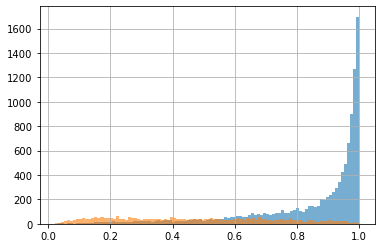

In [45]:
_ =plt.hist(y_pred[y_test == 0][:, 0], bins=100, alpha=0.6) # вероятность предсказания класса 0
_ =plt.hist(1- y_pred[y_test == 1][:, 1], bins=100, alpha=0.6)
plt.grid()

мы видим, что наша модель предсказала, что люди чаще получаю >50к

In [48]:
#  делаем путь pipeline и обучаем тренировочные данные svm
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [49]:
clf.score(X_train, y_train)

0.8409722425341484

In [50]:
clf.score(X_test, y_test)

0.8332082167474237

In [51]:
svc = SVC() # строим модель

In [52]:
svc.fit(X_train, y_train) # обучаем данные

SVC()

In [53]:
svc.score(X_test, y_test)

0.8110284583361769